# Proyecto 1 Inteligencia de negocios - Clasificación Fake News #

Grupo 17 - Miembros:

*   Juan Esteban Diaz Castro - 202121646 - Algoritmo: Regresión Logística
*   Jose Botello - 202022580 - Algoritmo: Naieve Bayes
*   Samuel Ramirez - 20


Instalar Librerias

In [1]:
%pip install numpy
%pip install pandas
%pip install joblib
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy
%pip install jupyter
%pip install swifter

%pip install num2words
%pip install inflect
%pip install spacy
!python -m spacy download es_core_news_sm
%pip install --upgrade pyarrow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\josem\appdata\local\programs\python\python39\lib\site-packages (1.5.2)



You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     --------------------------------------- 12.9/12.9 MB 25.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDOneClassSVM
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


import scipy.stats as stats
from scipy.sparse import hstack

import multiprocessing 
import spacy
import unicodedata
import sys
import re
import inflect
import num2words
import swifter
import pyarrow

!{sys.executable} -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

You should consider upgrading via the 'c:\Users\josem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     --------------------------------------- 12.9/12.9 MB 25.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


Carga del paquete de Lenguaje Español para spacy

In [3]:
nlp = spacy.load("es_core_news_sm")

# 1. Carga de Datos

Importamos el csv y hacemos un shape para poder ver la estructura de los datos

In [4]:
data = "./data/fake_news_spanish.csv"

news = pd.read_csv(data, sep=";", encoding="ISO-8859-1")

data_news = news.copy()

data_news.shape

(57063, 5)

In [5]:
data_news.sample(5)

,ID,Label,Titulo,Descripcion,Fecha
31622,ID,0,Las primarias de Cs para elegir a su candidato...,"De momento, solo el exvicepresidente madrileÃ±...",17/03/2021
33539,ID,1,COMERSE LOS MOCOS ES BUENO PARA LA SALUD (SIEM...,SegÃºn un informe confidencial del Tribunal de...,14/11/2022
28735,ID,1,'La Manada de Murcia' niega la violaciÃ³n en g...,Los tres hombres acusados de abusar sexualment...,10/05/2018
49519,ID,1,El Gobierno mantiene el plan de entrega de buq...,AmnistÃ­a Internacional reclama al Ejecutivo q...,28/01/2022
34352,ID,0,"JosÃ© Bernal, la historia olvidada del maestro...",Miguel Paz narra en su libro Â¡Viva la liberta...,12/04/2022


In [6]:
data_news.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

# 2. Perfilamiento de Datos

Separación datos en train y test

In [7]:
X_train, X_test, y_train , y_test = train_test_split(data_news, data_news["Label"], test_size=0.3, random_state=1)

X_train.shape, y_train.shape

((39944, 5), (39944,))

In [8]:
X_test.shape, y_test.shape

((17119, 5), (17119,))

In [9]:
X_train

,ID,Label,Titulo,Descripcion,Fecha
23862,ID,1,El Ayuntamiento de Barcelona reclama 'mano ten...,"Las cuentas ascienden a 3.600 millones, una ci...",14/10/2022
44273,ID,0,El EQUO vuelve a estar por encima del 30% en e...,Los de David de la Cruz y los de Pablo MÃ³nica...,30/01/2020
43156,ID,1,"MÃ¡s Madrid, Podemos y el Ayuntamiento de Madr...","JosÃ© Luis MartÃ­nez-Almeida, dice que quiere ...",08/04/2022
13087,ID,0,La presencia de mujeres en las cÃºpulas de los...,"EAJ-PNV y PNC, los dos partidos mÃ¡s crÃ­ticos...",07/03/2023
56295,ID,0,Las defensas intentan frenar que el caso ERE s...,Los abogados de los 22 ex altos cargos del Gob...,10/01/2018
...,...,...,...,...,...
50057,ID,0,Encuesta: Â¿CÃ³mo valora las penas a la cÃºpul...,El Supremo condena por sediciÃ³n a la cÃºpula ...,10/10/2019
32511,ID,0,Cristina Narbona insta a evitar el bloqueo y q...,Cualquier opciÃ³n es bienvenida. La opciÃ³n qu...,05/10/2019
5192,ID,1,La patronal reconoce que hay relaciÃ³n laboral...,El Ministerio de Trabajo y agentes sociales co...,10/02/2021
12172,ID,1,Aguado elige al jefe del Canal de Isabel II co...,"Rafael MartÃ­n Prieto, se sitÃºa como el princ...",30/08/2019


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39944 entries, 23862 to 33003
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39944 non-null  object
 1   Label        39944 non-null  int64 
 2   Titulo       39930 non-null  object
 3   Descripcion  39944 non-null  object
 4   Fecha        39944 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [11]:
X_train.count()

ID             39944
Label          39944
Titulo         39930
Descripcion    39944
Fecha          39944
dtype: int64

In [12]:
X_train.describe()

,Label
count,39944.000000
mean,0.580988
std,0.493403
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
X_train["Descripcion"].apply(len).describe()

count    39944.000000
mean       248.174645
std        283.665969
min         37.000000
25%        175.000000
50%        226.000000
75%        272.000000
max      14415.000000
Name: Descripcion, dtype: float64

2.2 Análisis de Calidad

2.2.1 Completitud

Revisamos el porcentaje casillas vacias por columna

In [14]:
df_porcentajes = (100*X_train.isna().sum()/len(X_train)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
Titulo,0.035049
ID,0.000000
Label,0.000000
Descripcion,0.000000
Fecha,0.000000


Miramos las filas incompletas

In [15]:
filas_incompletas = X_train[X_train.isna().any(axis=1)]
filas_incompletas


,ID,Label,Titulo,Descripcion,Fecha
3243,ID,0,NaN,"Hace unos 75 aÃ±os, Hermann GÃ¶ring testificÃ³...",16/06/2019
36724,ID,0,NaN,"Como muchos de ustedes recordarÃ¡n, ayer por l...",04/02/2023
55146,ID,0,NaN,Denuncia PÃºblica\r\nSe veÃ­a venir... En Gual...,15/02/2023
47967,ID,0,NaN,Se han dado a conocer los datos electorales pr...,19/04/2019
7345,ID,0,NaN,Defienden dichos con capitulos de Don Gato.\r\...,02/07/2023
7652,ID,0,NaN,Lean (y vean la imagen) con mucha atenciÃ³n:\r...,04/08/2018
4189,ID,0,NaN,"Evidentemente, Barak Obama ha sido arrestado e...",10/03/2022
5041,ID,0,NaN,"""DespuÃ©s de convertirme en presidente, le ped...",16/03/2022
35816,ID,0,NaN,#ÃLTIMA_HORA Le ordenarÃ© a los empresarios d...,07/05/2021
15159,ID,0,NaN,Declarar a Bill Gates enemigo pÃºblico y proce...,02/08/2024


Podemos eliminar los registros que estan vacios, porque en este caso asignarles un valor basado en la moda no tiene sentido ya que el titulo de la noticia sería diferente a la descripción

In [16]:
def drop_empty(train):

    train.dropna(inplace=True)

    return

print(drop_empty(train=X_train))

X_train.shape

None


(39930, 5)

In [17]:
filas_incompletas = X_train[X_train.isna().any(axis=1)]
filas_incompletas

,ID,Label,Titulo,Descripcion,Fecha


2.2.2 Duplicidad

Miramos las filas duplicadas

In [18]:
duplicated_rows = X_train.loc[X_train.duplicated(subset=["Titulo"]+["Descripcion"], keep=False)].sort_values("Titulo")
duplicated_rows

,ID,Label,Titulo,Descripcion,Fecha
14575,ID,1,"'Hazlo por Madrid', el lema del PSOE se centra...",Gabilondo asegura que si hay movilizaciÃ³n Ayu...,12/04/2021
40673,ID,1,"'Hazlo por Madrid', el lema del PSOE se centra...",Gabilondo asegura que si hay movilizaciÃ³n Ayu...,12/04/2021
31439,ID,1,'SÃ¡lvame Deluxe' entra en polÃ­tica,El presentador del programa de Telecinco acomp...,24/04/2021
13847,ID,1,'SÃ¡lvame Deluxe' entra en polÃ­tica,El presentador del programa de Telecinco acomp...,24/04/2021
50738,ID,1,70.000 millones en tres aÃ±os para modernizar ...,El 39% de los fondos se destinarÃ¡ a la transi...,13/04/2021
...,...,...,...,...,...
28964,ID,1,Â¿A quÃ© hora puedo ir a votar en las eleccion...,La Comunidad de Madrid ha establecido una guÃ­...,30/04/2021
54584,ID,1,Â¿Hartazgo de centralismo en ValÃ¨ncia?,La guerra de declaraciones entre Ayuso y el go...,15/04/2021
54615,ID,1,Â¿Hartazgo de centralismo en ValÃ¨ncia?,La guerra de declaraciones entre Ayuso y el go...,15/04/2021
10974,ID,1,Â¿Ignorarles o rebatirles?: la nueva campaÃ±a ...,La formaciÃ³n de Abascal busca normalizar las ...,21/04/2021


Eliminar noticias duplicadas

In [19]:
def drop_duplicates(train):

    train.drop_duplicates(subset = ['Titulo'] + ['Descripcion'], keep = 'first', inplace = True)

    duplicated_rows = data_news.loc[data_news.duplicated(subset=["Titulo"]+["Descripcion"], keep=False)].sort_values("Titulo")

    return

print(drop_duplicates(train=X_train))

X_train.shape

None


(39706, 5)

In [20]:
duplicated_rows = X_train.loc[X_train.duplicated(subset=["Titulo"]+["Descripcion"], keep=False)].sort_values("Titulo")
duplicated_rows

,ID,Label,Titulo,Descripcion,Fecha


2.2.3 Consistencia

Verificamos la longitud de los titulos y descripciones

In [21]:
len_titulo = X_train["Titulo"].apply(len)
len_descripcion = X_train["Descripcion"].apply(len)

print("Longitud del Titulo: \n" + str(len_titulo))
print("\nLongitud de la Descripcion: \n" + str(len_descripcion))


Longitud del Titulo: 
23862    109
44273    112
43156    117
13087    130
56295     78
        ... 
50057     62
32511     97
5192     111
12172     85
33003     84
Name: Titulo, Length: 39706, dtype: int64

Longitud de la Descripcion: 
23862    237
44273    273
43156    263
13087    142
56295    330
        ... 
50057    104
32511    160
5192     366
12172    225
33003    191
Name: Descripcion, Length: 39706, dtype: int64


In [22]:
len_titulo.describe()

count    39706.000000
mean        96.482219
std         22.080211
min         13.000000
25%         81.000000
50%         96.000000
75%        113.000000
max        261.000000
Name: Titulo, dtype: float64

In [23]:
len_descripcion.describe()

count    39706.000000
mean       247.573843
std        280.119402
min         37.000000
25%        175.000000
50%        226.000000
75%        272.000000
max      14415.000000
Name: Descripcion, dtype: float64

2.2.4 Validez

In [24]:
X_train.describe()

,Label
count,39706.000000
mean,0.579333
std,0.493672
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Cambiamos las fechas a formato datetime

In [25]:
X_train["Fecha"] = pd.to_datetime(X_train["Fecha"])

C:\Users\josem\AppData\Local\Temp\ipykernel_20576\1149166573.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X_train["Fecha"] = pd.to_datetime(X_train["Fecha"])


In [26]:
X_train["Fecha"].value_counts()

Fecha
2023-05-29    67
2019-05-27    58
2019-04-24    54
2019-07-18    52
2019-06-05    50
              ..
2024-09-09     1
2023-08-12     1
2017-02-11     1
2023-11-21     1
2017-08-22     1
Name: count, Length: 2198, dtype: int64

# 3. Preparación de Datos

3.1. Limpieza de Datos

Tratar de dejar el texto lo más limpio posible para poder hacer el procesamiento de tokenización, para eso vamos a revisar los caracters de ascii las mayusuclas, los signos de puntuación, los números, las stopwords y demas elementos que solo generan imperfecciones a la hora de realizar la tokenizacion

In [27]:
def limpiar_ascii(train):

    train["Titulo"] = train["Titulo"].apply(lambda x: unicodedata.normalize("NFKD", x).encode("ascii", "ignore").decode("utf-8"))
    train["Descripcion"] = train["Descripcion"].apply(lambda x: unicodedata.normalize("NFKD", x).encode("ascii", "ignore").decode("utf-8"))

    return


def limpiar_mayusculas(train):

    train["Titulo"] = train["Titulo"].str.lower()
    train["Descripcion"] = train["Descripcion"].str.lower()

    return


def limpiar_puntuacion(train):

    train["Titulo"] = train["Titulo"].apply(lambda x: re.sub(r'[.:,;-_¿?¡!"\'()\[\]{}\/%\$@+*\^]', '', x))
    train["Descripcion"] = train["Descripcion"].apply(lambda x: re.sub(r'[.:,;-_¿?¡!"\'()\[\]{}\/%\$@+*\^]', '', x))
    
    return


def limpiar_numeros(train):

    train["Titulo"] = train["Titulo"].apply(lambda x: re.sub(r'\b\d+\b', lambda y: num2words.num2words(y.group(), lang='es'), x))
    train["Descripcion"] = train["Descripcion"].apply(lambda x: re.sub(r'\b\d+\b', lambda y: num2words.num2words(y.group(), lang='es'), x))

    return


palabras_stop = nlp.Defaults.stop_words

palabras_s = r'\b(?:' + '|'.join(palabras_stop) + r')\b'

def limpiar_stopwords(train):

    train["Titulo"] = train["Titulo"].apply(lambda x: re.sub(palabras_s, '', x))
    train["Descripcion"] = train["Descripcion"].apply(lambda x: re.sub(palabras_s, '', x))

    return

def limpiar_guiones(train):

    train["Titulo"] = train["Titulo"].apply(lambda x: x.replace("-", " "))
    train["Descripcion"] = train["Descripcion"].apply(lambda x: x.replace("-", " "))

    return

numeros_post_ascii = r'[0123456789]'

def limpiar_numeros_ascii(train):

    train["Titulo"] = train["Titulo"].apply(lambda x: re.sub(numeros_post_ascii, '', x))
    train["Descripcion"] = train["Descripcion"].apply(lambda x: re.sub(numeros_post_ascii, '', x))

    return


In [28]:
def limpiar_texto(train):

    limpiar_ascii(train=train)
    limpiar_mayusculas(train=train)
    limpiar_puntuacion(train=train)
    limpiar_numeros(train=train)
    limpiar_stopwords(train=train)
    limpiar_guiones(train=train)
    limpiar_numeros_ascii(train=train)

    return

limpiar_texto(train=X_train)

print(X_train)

       ID  Label                                             Titulo  \
23862  ID      1   ayuntamiento  barcelona reclama mano tendida ...   
44273  ID      0   equo vuelve      treinta  estimacian  voto  p...   
43156  ID      1   madrid    ayuntamiento  madrid  personan  acu...   
13087  ID      0   presencia  mujeres   caopulas   partidos sa e...   
56295  ID      0   defensas intentan frenar   caso ere  juzgue  ...   
...    ..    ...                                                ...   
50057  ID      0     encuesta acamo valora  penas   caopula  procas   
32511  ID      0  cristina narbona insta  evitar  bloqueo     pa...   
5192   ID      1   patronal reconoce   relacian laboral  empresa...   
12172  ID      1  aguado elige  jefe  canal  isabel ii  praximo ...   
33003  ID      1  archivada  causa   policaas  madrid  insultos ...   

                                             Descripcion      Fecha  
23862   cuentas ascienden   mil seiscientos millones ... 2022-10-14  
44273  

3.2. Tokenizacion

Vamos a tokenizar por medio de spacy que ya tiene integrada esta función, además utilizamos otra librería llamada swifter para poder reducir los tiempos de ejecución de la tokenización por medio del procesamiento en paralelo.

In [29]:
def tokenizar(train):

    train["Titulo_T"] = train["Titulo"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: [token.text for token in nlp(x) if not token.is_space])
    train["Descripcion_T"] = train["Descripcion"].swifter.allow_dask_on_strings(enable=True).apply(lambda x: [token.text for token in nlp(x) if not token.is_space])

    return

tokenizar(train=X_train)

Dask Apply:   0%|          | 0/17 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/17 [00:00<?, ?it/s]

3.3. Vectorización

Vectorizamos el conjunto de train con fit, para declarar las palabras y luego el conjunto de test lo vectorizamos con transform para no sobrescribir las palabras del paso anterior

In [30]:
vectorizador = CountVectorizer() 

def vectorizar(train):

    global vectorizador

    textos = train["Titulo_T"].astype(str) + " " + train["Descripcion_T"].astype(str)

    vector_df = vectorizador.fit_transform(textos)

    return vector_df

vectorizacion = vectorizar(train=X_train)

print(vectorizacion)

def vectorizar_test(train):

    global vectorizador
    
    textos = train["Titulo_T"].astype(str) + " " + train["Descripcion_T"].astype(str)

    vector_df = vectorizador.transform(textos)

    return vector_df


  (np.int32(0), np.int32(5946))	1
  (np.int32(0), np.int32(6239))	1
  (np.int32(0), np.int32(36278))	1
  (np.int32(0), np.int32(27872))	1
  (np.int32(0), np.int32(41847))	1
  (np.int32(0), np.int32(31171))	1
  (np.int32(0), np.int32(4110))	1
  (np.int32(0), np.int32(34378))	1
  (np.int32(0), np.int32(3462))	1
  (np.int32(0), np.int32(12449))	1
  (np.int32(0), np.int32(4838))	1
  (np.int32(0), np.int32(28919))	1
  (np.int32(0), np.int32(39533))	1
  (np.int32(0), np.int32(28974))	1
  (np.int32(0), np.int32(9118))	1
  (np.int32(0), np.int32(35721))	1
  (np.int32(0), np.int32(41202))	1
  (np.int32(0), np.int32(16430))	1
  (np.int32(0), np.int32(22486))	1
  (np.int32(0), np.int32(21028))	1
  (np.int32(0), np.int32(16727))	1
  (np.int32(0), np.int32(40314))	1
  (np.int32(0), np.int32(11362))	1
  (np.int32(0), np.int32(42660))	1
  (np.int32(0), np.int32(6294))	1
  :	:
  (np.int32(39704), np.int32(16567))	1
  (np.int32(39704), np.int32(7740))	1
  (np.int32(39704), np.int32(42730))	1
  (np.int3

In [31]:
def preparacion_datos_train(x):

    drop_empty(train=x)
    drop_duplicates(train=x)
    limpiar_texto(train=x)
    tokenizar(train=x)
    x_final = vectorizar(train=x)

    return x_final

def preparacion_datos_test(x):

    drop_empty(train=x)
    drop_duplicates(train=x)
    limpiar_texto(train=x)
    tokenizar(train=x)
    x_final = vectorizar_test(train=x)

    return x_final

def actualizar_y_test(x):

    drop_empty(train=x)
    drop_duplicates(train=x)
    
    return


# 4. Modelado

Generamos nuestro modelo de Regresión Logística

In [32]:
x = preparacion_datos_train(x=X_train)

y = X_train["Label"]

print(x.shape, y.shape)

model = LogisticRegression()
model.fit(x, y)

Dask Apply:   0%|          | 0/17 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/17 [00:00<?, ?it/s]

(39705, 45153) (39705,)


LogisticRegression()

Hacemos uso del test para predecir los valores con el modelo de la regresión logística

In [33]:
x_prep = preparacion_datos_test(x=X_test)

print(x_prep)

yt = model.predict(x_prep)

Dask Apply:   0%|          | 0/17 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/17 [00:00<?, ?it/s]

  (np.int32(0), np.int32(362))	1
  (np.int32(0), np.int32(1727))	1
  (np.int32(0), np.int32(2452))	1
  (np.int32(0), np.int32(3615))	1
  (np.int32(0), np.int32(8294))	1
  (np.int32(0), np.int32(10912))	1
  (np.int32(0), np.int32(10956))	1
  (np.int32(0), np.int32(16134))	1
  (np.int32(0), np.int32(21464))	1
  (np.int32(0), np.int32(25897))	1
  (np.int32(0), np.int32(26519))	1
  (np.int32(0), np.int32(27420))	1
  (np.int32(0), np.int32(27981))	1
  (np.int32(0), np.int32(28270))	1
  (np.int32(0), np.int32(28303))	1
  (np.int32(0), np.int32(28474))	1
  (np.int32(0), np.int32(32493))	1
  (np.int32(0), np.int32(33360))	1
  (np.int32(0), np.int32(36379))	2
  (np.int32(0), np.int32(39144))	1
  (np.int32(0), np.int32(43841))	1
  (np.int32(0), np.int32(44253))	1
  (np.int32(1), np.int32(901))	1
  (np.int32(1), np.int32(5491))	1
  (np.int32(1), np.int32(7887))	1
  :	:
  (np.int32(17072), np.int32(36577))	2
  (np.int32(17072), np.int32(41637))	1
  (np.int32(17072), np.int32(43844))	1
  (np.int32(

Realizamos el proceso de cálculo de métricas para la regresión logística por medio de la libreria sklearn

Exactitud del modelo por medio de regresión logística: 0.8895982195150521
Sensibilidad del modelo por medio de regresión logística: 0.9276634382566586
Precision del modelo por medio de regresión logística: 0.8872913249059152
Puntuación F1 del modelo por medio de regresión logística: 0.9070283600493219
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7162
           1       0.89      0.93      0.91      9912

    accuracy                           0.89     17074
   macro avg       0.89      0.88      0.89     17074
weighted avg       0.89      0.89      0.89     17074



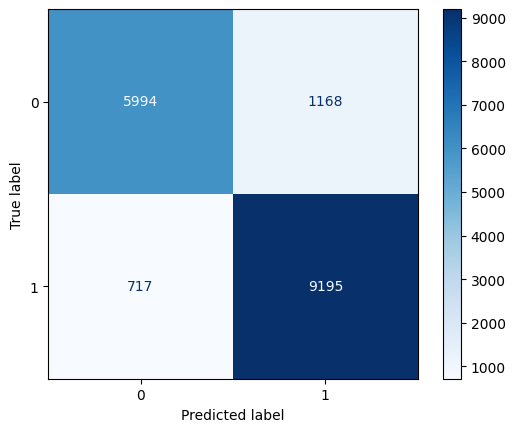

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

actualizar_y_test(x=X_test)
y_test = X_test["Label"]

exactitud = accuracy_score(y_test, yt)
print("Exactitud del modelo por medio de regresión logística: " + str(exactitud))

recall = recall_score(y_test, yt)
print("Sensibilidad del modelo por medio de regresión logística: " + str(recall))

precision = precision_score(y_test, yt)
print("Precision del modelo por medio de regresión logística: " + str(precision))

puntuacion_F1 = f1_score(y_test, yt)
print("Puntuación F1 del modelo por medio de regresión logística: " + str(puntuacion_F1))

matrix_logistic = confusion_matrix(y_test, yt)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix_logistic)
disp.plot(cmap="Blues")

print(classification_report(y_test, yt))

Probando con test que tiene un total de 17074 datos, vemos que hay en total 15189 datos que son clasificados de manera correcta y solamente 1885 datos que no estan clasificados de manera correcta

Ahora generamos nuestro modelo con maquinas de soporte de vectores


In [35]:

modelSVM = SVC(max_iter=10000)
#modelSVM = LinearSVC(max_iter=100000)
modelSVM.fit(x,y)
salidavectores = modelSVM.predict(x_prep)


c:\Users\josem\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Observamos la efectividad del modelo frente a las métricas planteadas


{np.int64(0): np.int64(6711), np.int64(1): np.int64(10363)}
{np.int64(0): np.int64(6072), np.int64(1): np.int64(11002)}
{np.int64(0): np.int64(6711), np.int64(1): np.int64(10363)}
23862    1
44273    0
43156    1
13087    0
56295    0
        ..
50057    0
32511    0
5192     1
12172    1
33003    1
Name: Label, Length: 39705, dtype: int64
Exactitud del modelo por medio de máquinas de vectores: 0.8842684783881926
Sensibilidad del modelo por medio de máquinas de vectores: 0.9553066989507667
Precision del modelo por medio de máquinas de vectores: 0.860661697873114
Puntuación F1 del modelo por medio de maquinas de vectores: 0.9055178349431003
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      7162
           1       0.86      0.96      0.91      9912

    accuracy                           0.88     17074
   macro avg       0.89      0.87      0.88     17074
weighted avg       0.89      0.88      0.88     17074



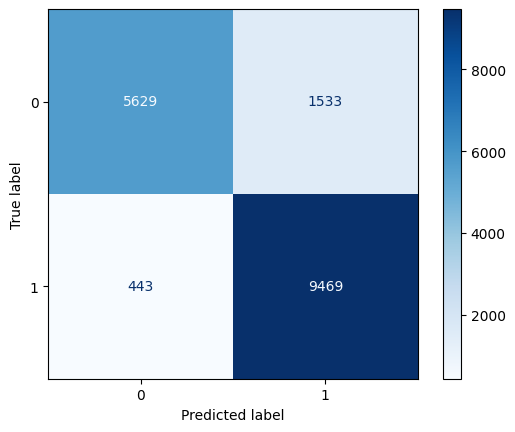

In [36]:
salidavectores = np.where(salidavectores == -1, 0, salidavectores)
valores_unicosyt, conteosyt = np.unique(yt, return_counts=True)
valores_unicos, conteos = np.unique(salidavectores, return_counts=True)


# Mostrar los resultados
print(dict(zip(valores_unicosyt, conteosyt)))
print(dict(zip(valores_unicos, conteos)))

# Mostrar los resultados
print(dict(zip(valores_unicosyt, conteosyt)))
print(y)
exactitudsvm = accuracy_score(y_test, salidavectores)
print("Exactitud del modelo por medio de máquinas de vectores: " + str(exactitudsvm))

recallsvm = recall_score(y_test, salidavectores)
print("Sensibilidad del modelo por medio de máquinas de vectores: " + str(recallsvm))

precisionsvm = precision_score(y_test, salidavectores)
print("Precision del modelo por medio de máquinas de vectores: " + str(precisionsvm))

puntuacion_F1svm = f1_score(y_test, salidavectores)
print("Puntuación F1 del modelo por medio de maquinas de vectores: " + str(puntuacion_F1svm))

matrix_logisticsvm = confusion_matrix(y_test, salidavectores)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix_logisticsvm)
disp.plot(cmap="Blues")

print(classification_report(y_test, salidavectores))

Por último generamos nuestro modelo de Naive Bayes

In [37]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

# Cargar los datos
data = pd.read_csv("./data/fake_news_spanish.csv", sep=";", encoding="ISO-8859-1")

# primeras filas para entender la estructura
print(data.head())

#columnas disponibles
print(data.columns)

   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con SÃ¡nchez: 'Europa necesi...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÃN...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda DÃ­az, ERC y EH Bil...   
4  ID      0  Puigdemont: 'No serÃ­a ninguna tragedia una re...   

                                         Descripcion       Fecha  
0  El diario britÃ¡nico publicÃ³ este pasado juev...  02/06/2023  
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÃN...  01/10/2023  
2  El valencianismo convoca en CastellÃ³ su fiest...  25/04/2022  
3  En polÃ­tica, igual que hay que negociar con l...  03/01/2022  
4  En una entrevista en El Punt Avui, el lÃ­der d...  09/03/2018  
Index(['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha'], dtype='object')


Empezaremos importando las librerías y cargamos los datos.
#Usamos pandas para manejar los datos. Usamos el train_test_split para dividir los datos en entrenamiento y prueba.
#MultinomialNB y GaussianNB se usan para probar los modelos de Naive Bayes.
#CountVectorizer lo usamos para transformar texto en datos numéricos. Cargamos el dataset y se muestra la estructura

In [38]:
print(data.columns)

X = data["Descripcion"]  
y = data["Label"]

# conjunto de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# pasar de texto a una matriz de frecuencias de palabras
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# verificar dimensiones despues de la transformacion
print("Dimensión de X_train después de vectorizar:", X_train_vec.shape)
print("Dimensión de X_test después de vectorizar:", X_test_vec.shape)

Index(['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha'], dtype='object')
Tamaño del conjunto de entrenamiento: (45650,)
Tamaño del conjunto de prueba: (11413,)
Dimensión de X_train después de vectorizar: (45650, 42377)
Dimensión de X_test después de vectorizar: (11413, 42377)


In [39]:
from sklearn.naive_bayes import MultinomialNB

# crear y entrenar el modelo
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# predicciones en el conjunto de prueba
y_pred = model.predict(X_test_vec)

# primeras predicciones
print("Primeras predicciones:", y_pred[:10])

Primeras predicciones: [1 0 1 1 0 1 1 1 1 1]


Exactitud del modelo: 0.7047
Precisión del modelo: 0.7236
Sensibilidad (recall) del modelo: 0.7924
Puntuación F1 del modelo: 0.7565

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.58      0.63      4808
           1       0.72      0.79      0.76      6605

    accuracy                           0.70     11413
   macro avg       0.70      0.69      0.69     11413
weighted avg       0.70      0.70      0.70     11413



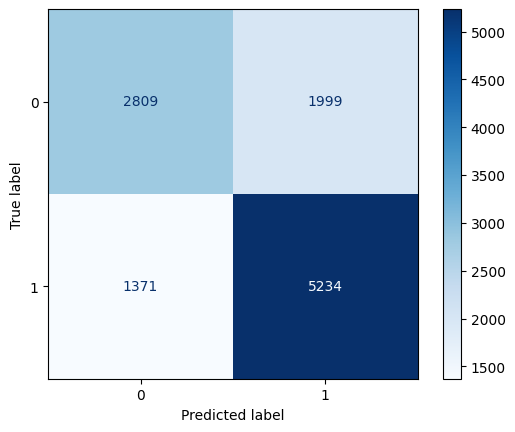

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# se calculan las metricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir
print(f"Exactitud del modelo: {accuracy:.4f}")
print(f"Precisión del modelo: {precision:.4f}")
print(f"Sensibilidad (recall) del modelo: {recall:.4f}")
print(f"Puntuación F1 del modelo: {f1:.4f}")

# reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")